In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df=df[df['balance'] > 0]

In [6]:
df['age'].describe()

count    37931.000000
mean        40.985025
std         10.762390
min         18.000000
25%         33.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

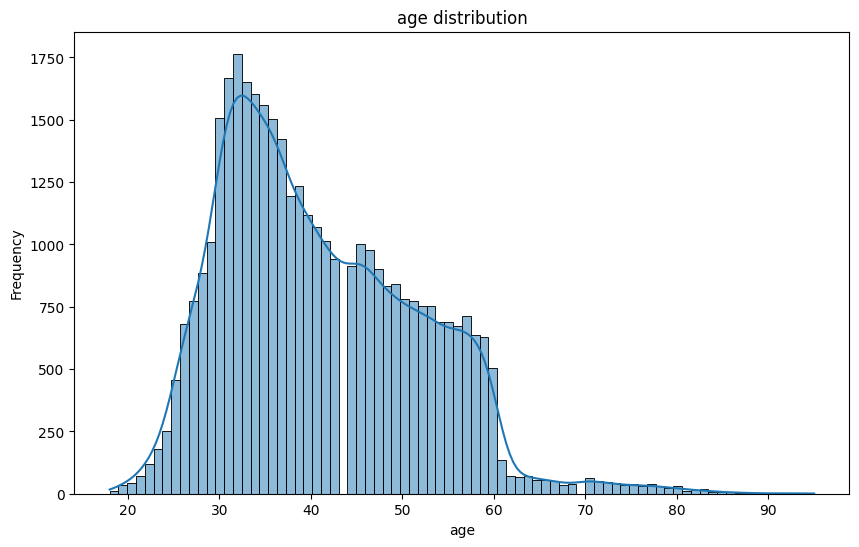

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'],bins=80, kde=True)  
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("Frequency")
plt.show()

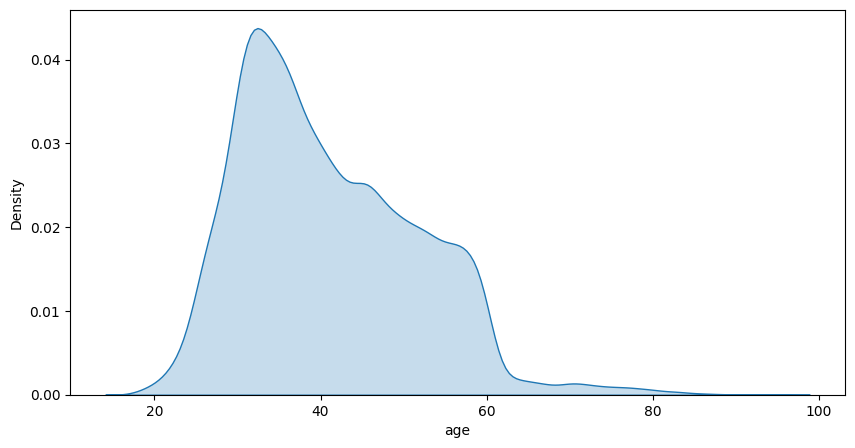

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['age'],fill=True)
plt.show()


In [9]:
df['job'].value_counts()

job
management       8053
blue-collar      8006
technician       6334
admin.           4312
services         3355
retired          1977
self-employed    1367
entrepreneur     1220
unemployed       1122
housemaid        1049
student           880
unknown           256
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1419761387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['job'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1419761387.py:2: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot( x=df['job'].value_counts().index,


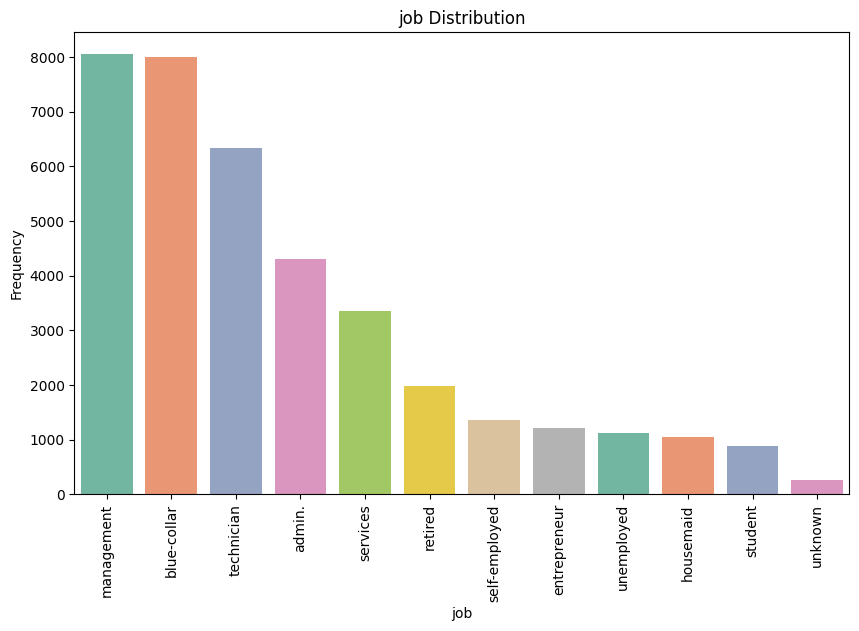

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['job'].value_counts().index,
            y=df['job'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('job Distribution')
plt.xlabel('job')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [11]:
df['marital'].value_counts()

marital
married     22737
single      11030
divorced     4164
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\3964297961.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['marital'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\3964297961.py:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot( x=df['marital'].value_counts().index,


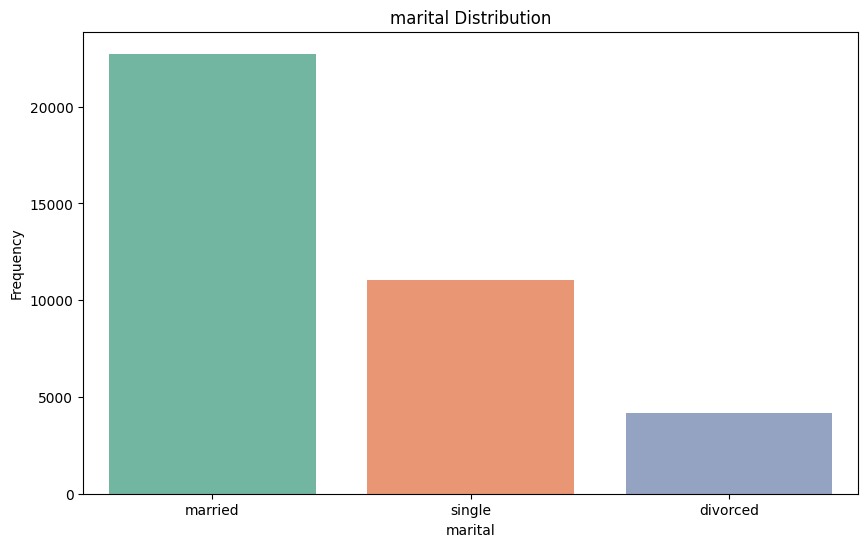

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['marital'].value_counts().index,
            y=df['marital'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('marital Distribution')
plt.xlabel('marital')
plt.ylabel('Frequency')
plt.show()

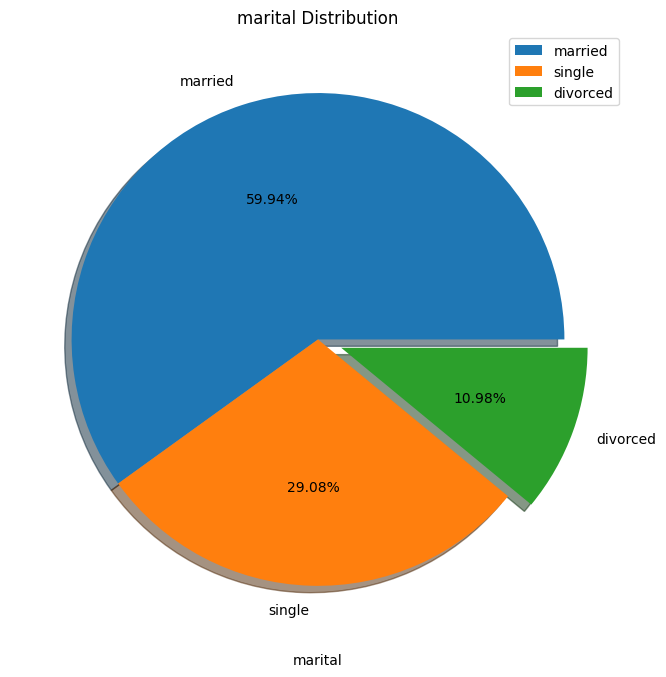

In [13]:
plt.figure(figsize=(10, 8))
plt.pie(df['marital'].value_counts(),
        explode=[0,0,0.1],
        labels=df['marital'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('marital Distribution')
plt.xlabel('marital')
plt.legend()
plt.show()

In [14]:
df['education'].value_counts()

education
secondary    19171
tertiary     11455
primary       5707
unknown       1598
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1601394077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['education'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1601394077.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot( x=df['education'].value_counts().index,


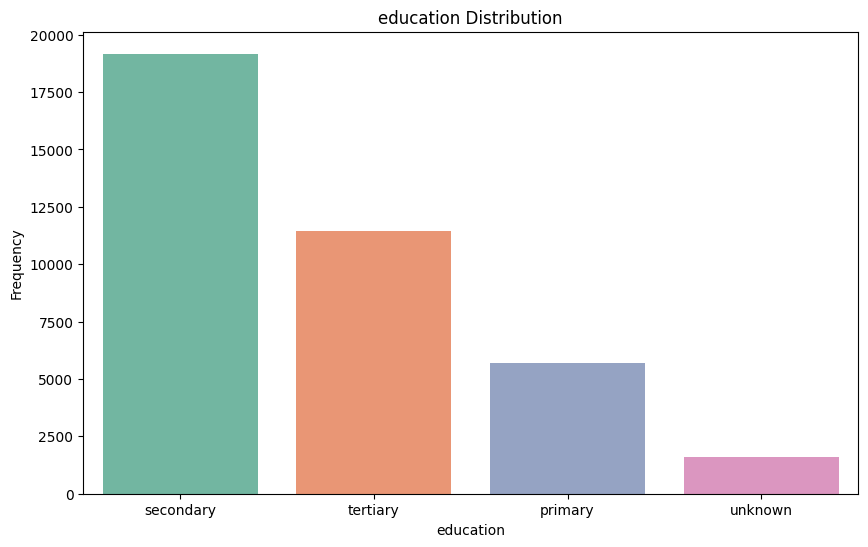

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['education'].value_counts().index,
            y=df['education'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('education Distribution')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.show()

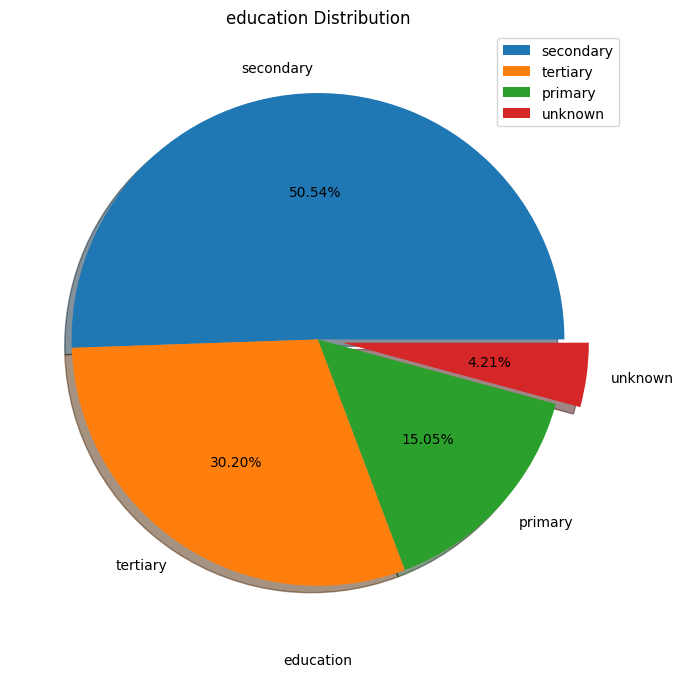

In [16]:
plt.figure(figsize=(10, 8))
plt.pie(df['education'].value_counts(),
        explode=[0,0,0,0.1],
        labels=df['education'].value_counts().index,
        shadow=True, autopct="%1.2f%%")
plt.title('education Distribution')
plt.xlabel('education')
plt.legend()
plt.show()

In [17]:
df['default'].value_counts()

default
no     37672
yes      259
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1285343742.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['default'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1285343742.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['default'].value_counts().index,


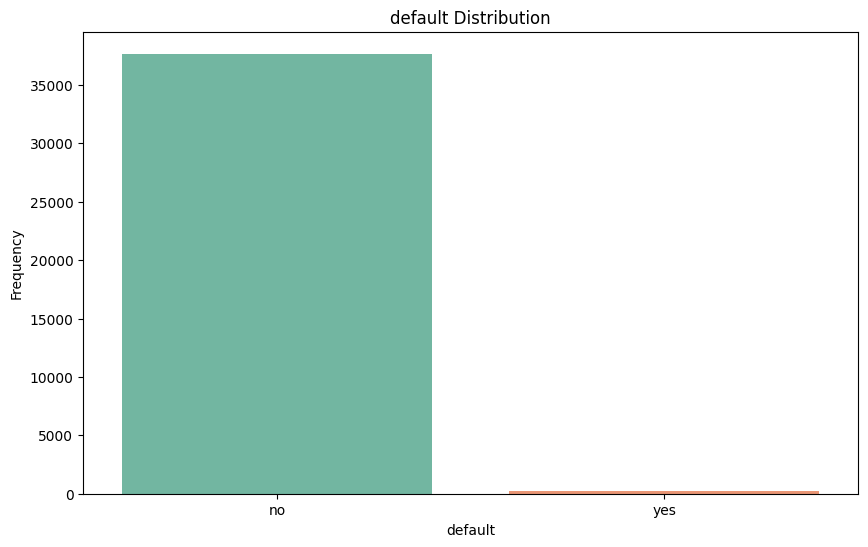

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['default'].value_counts().index,
            y=df['default'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('default Distribution')
plt.xlabel('default')
plt.ylabel('Frequency')
plt.show()

In [19]:
df['balance'].describe()

count     37931.000000
mean       1655.270254
std        3240.126649
min           1.000000
25%         226.500000
50%         644.000000
75%        1776.000000
max      102127.000000
Name: balance, dtype: float64

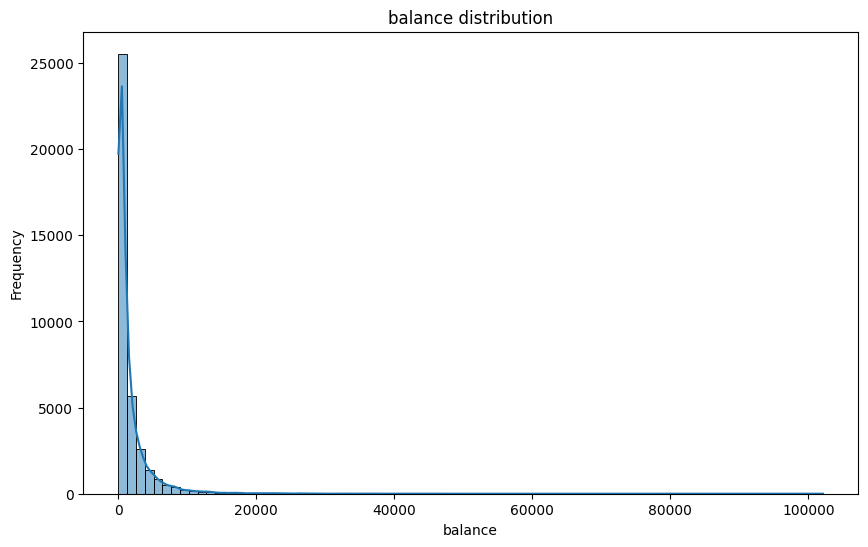

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df['balance'],bins=80, kde=True)  
plt.title("balance distribution")
plt.xlabel("balance")
plt.ylabel("Frequency")
plt.show()

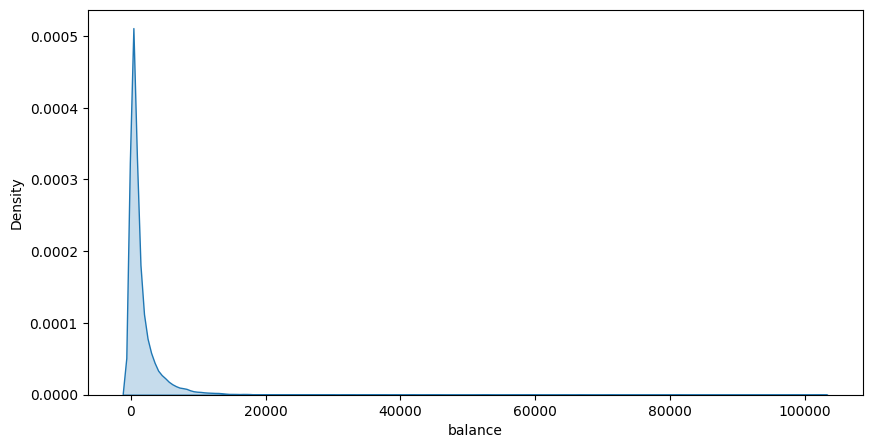

In [21]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['balance'],fill=True)
plt.show()


In [22]:
df['housing'].value_counts()

housing
yes    20734
no     17197
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\627565142.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['housing'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\627565142.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['housing'].value_counts().index,


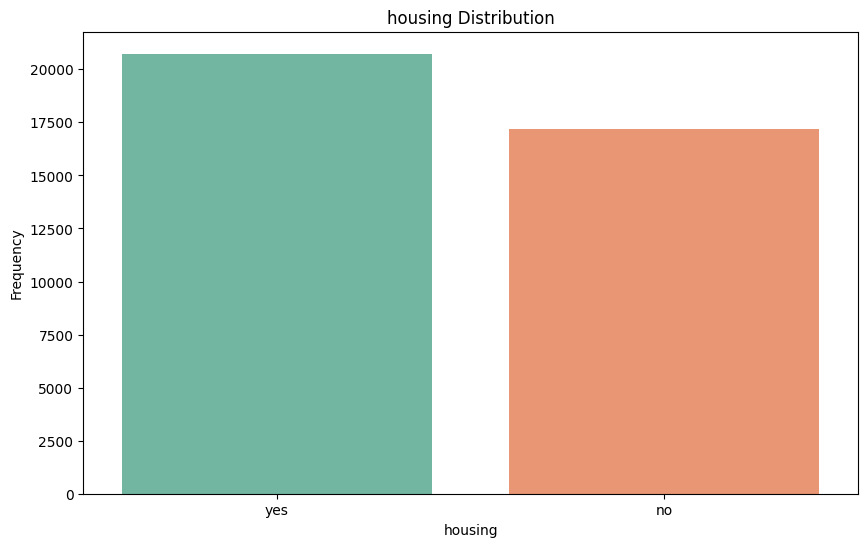

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['housing'].value_counts().index,
            y=df['housing'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('housing Distribution')
plt.xlabel('housing')
plt.ylabel('Frequency')
plt.show()

In [24]:
df['loan'].value_counts()

loan
no     32456
yes     5475
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\4043966192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['loan'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\4043966192.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['loan'].value_counts().index,


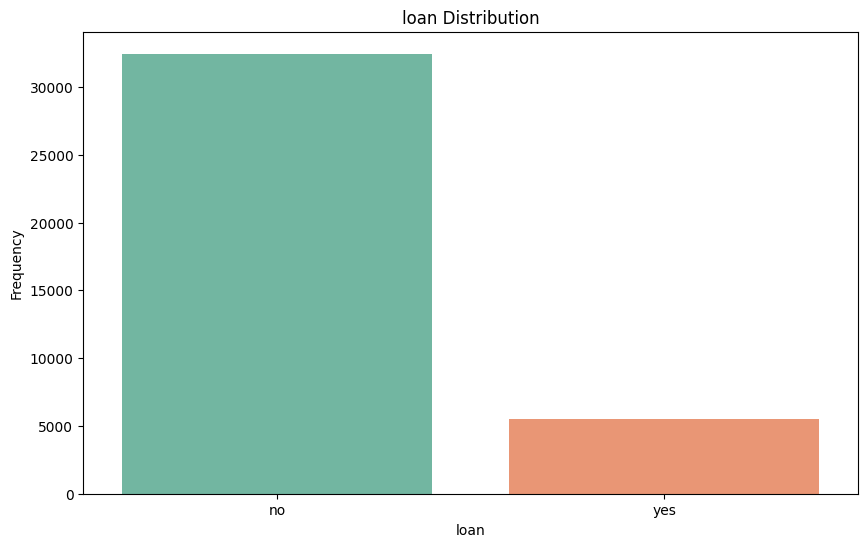

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['loan'].value_counts().index,
            y=df['loan'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('loan Distribution')
plt.xlabel('loan')
plt.ylabel('Frequency')
plt.show()

In [26]:
df['contact'].value_counts()

contact
cellular     24751
unknown      10669
telephone     2511
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1962019015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['contact'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1962019015.py:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot( x=df['contact'].value_counts().index,


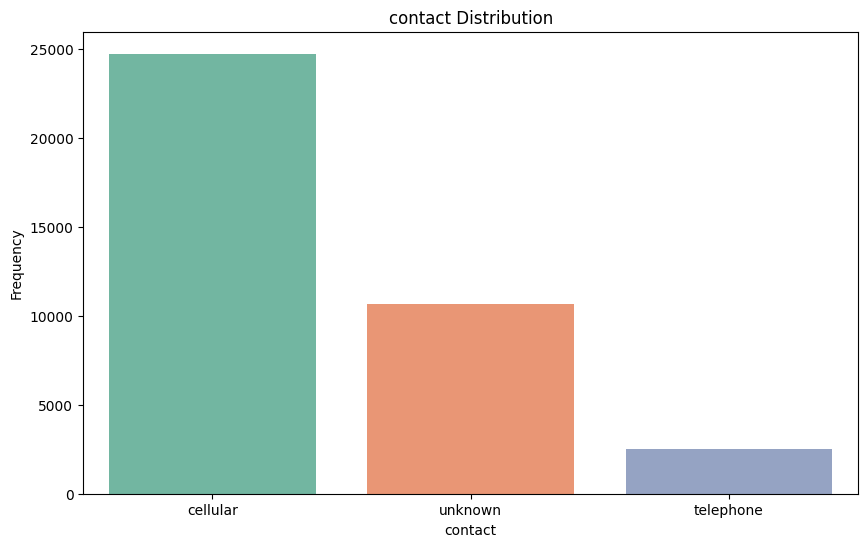

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['contact'].value_counts().index,
            y=df['contact'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('contact Distribution')
plt.xlabel('contact')
plt.ylabel('Frequency')
plt.show()

In [28]:
df['day'].value_counts()

day
20    2392
18    1950
21    1675
17    1663
5     1623
6     1604
14    1586
8     1551
19    1513
7     1495
29    1465
28    1458
15    1435
12    1395
13    1366
30    1324
9     1303
4     1258
11    1226
16    1213
2     1108
3      913
27     843
26     794
23     759
22     735
25     704
31     515
10     428
24     358
1      279
Name: count, dtype: int64

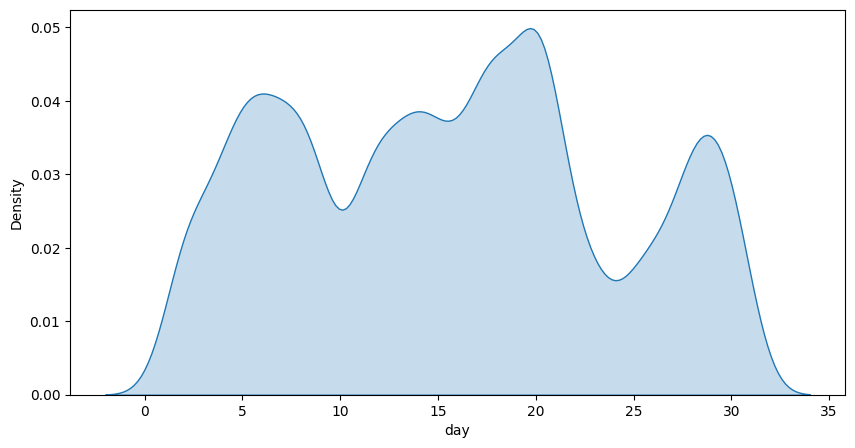

In [29]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['day'],fill=True)
plt.show()


In [30]:
df['month'].value_counts()

month
may    11282
aug     5280
jul     5264
jun     4534
nov     3496
apr     2641
feb     2350
jan     1228
oct      677
sep      532
mar      444
dec      203
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1618121730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['month'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1618121730.py:2: UserWarning: 
The palette list has fewer values (8) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.barplot( x=df['month'].value_counts().index,


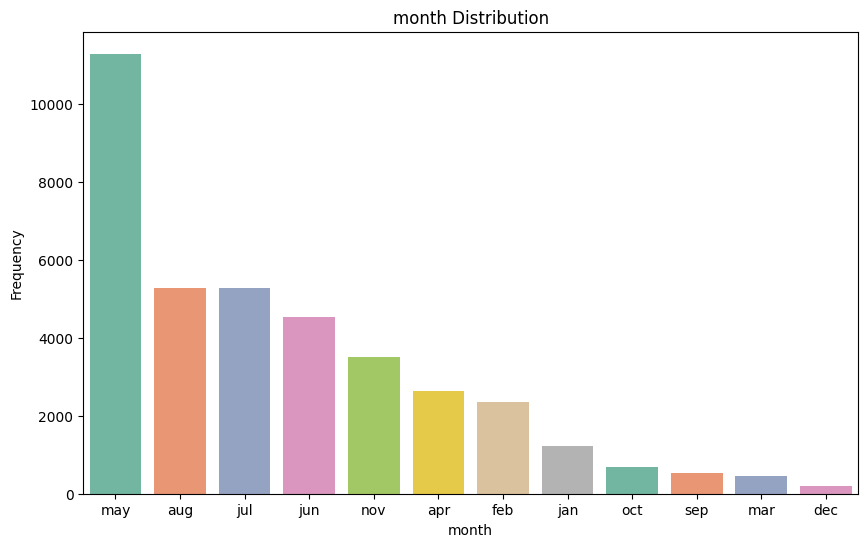

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['month'].value_counts().index,
            y=df['month'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('month Distribution')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.show()

In [32]:
df['duration'].describe()

count    37931.000000
mean       259.879386
std        259.235650
min          0.000000
25%        104.000000
50%        181.000000
75%        322.000000
max       4918.000000
Name: duration, dtype: float64

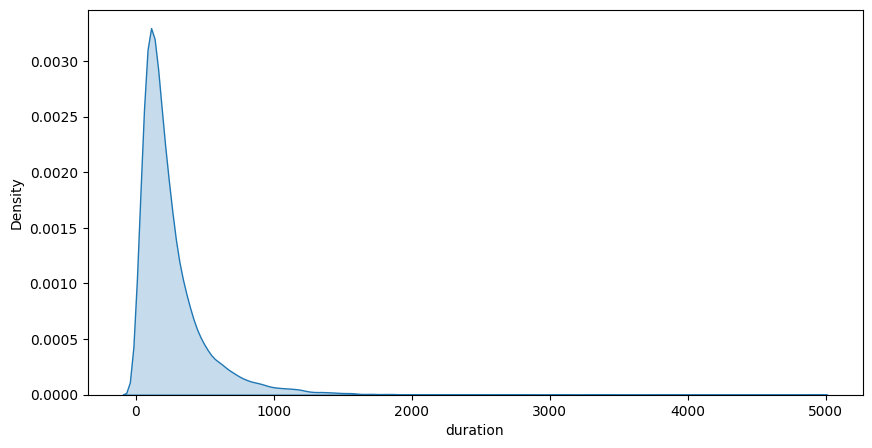

In [33]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['duration'],fill=True)
plt.show()


In [34]:
df['campaign'].value_counts()

campaign
1     14878
2     10452
3      4660
4      2930
5      1469
6      1057
7       615
8       452
9       270
10      215
11      167
12      121
13      105
14       80
15       65
16       58
17       51
18       44
19       36
20       33
21       29
25       17
24       15
22       15
23       13
29       12
26        9
28        9
31        7
32        7
27        7
30        7
33        4
35        3
34        2
36        2
41        2
50        2
37        2
51        1
38        1
55        1
63        1
46        1
58        1
43        1
39        1
44        1
Name: count, dtype: int64

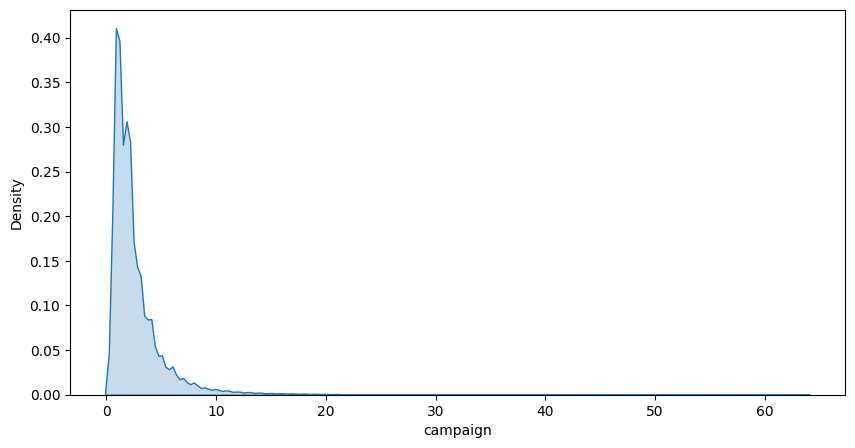

In [35]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['campaign'],fill=True)
plt.show()


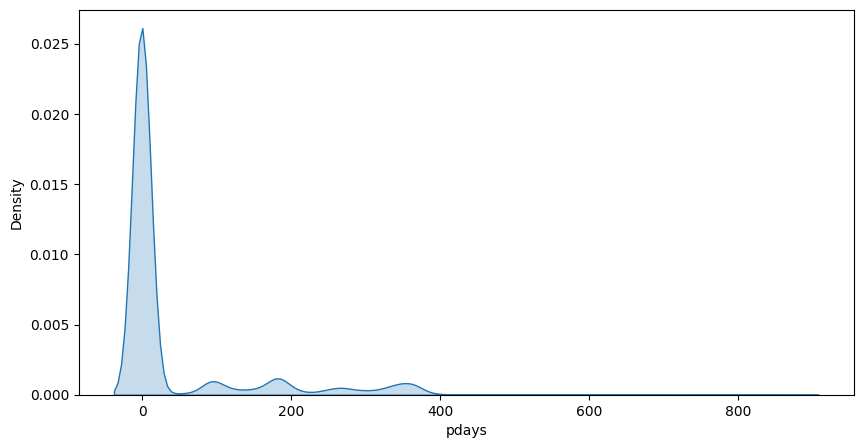

In [36]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['pdays'],fill=True)
plt.show()


In [37]:
df['previous'].value_counts()

previous
0      30611
1       2457
2       1856
3       1015
4        646
5        407
6        241
7        184
8        113
9         79
10        64
11        56
12        39
13        34
14        16
15        15
17        13
16        12
19        11
23         7
20         6
22         6
24         5
27         5
18         4
29         4
21         4
30         3
25         3
26         2
37         2
28         2
38         1
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64

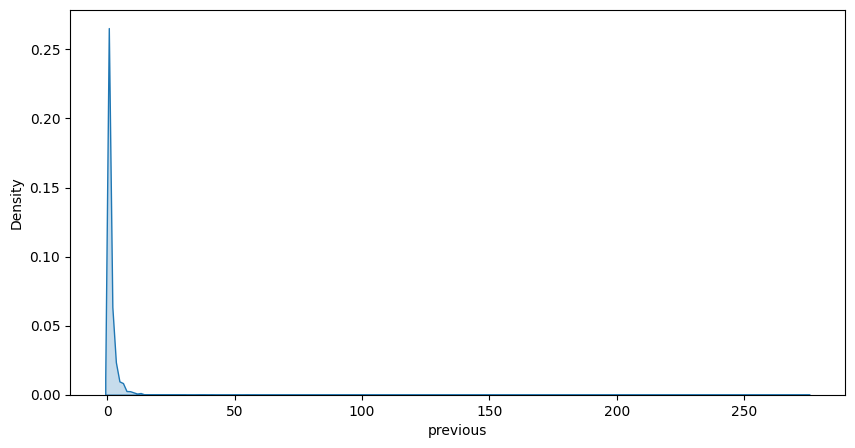

In [38]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['previous'],fill=True)
plt.show()


In [39]:
df['poutcome'].value_counts()

poutcome
unknown    30616
failure     4284
other       1602
success     1429
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\2189292350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['poutcome'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\2189292350.py:2: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot( x=df['poutcome'].value_counts().index,


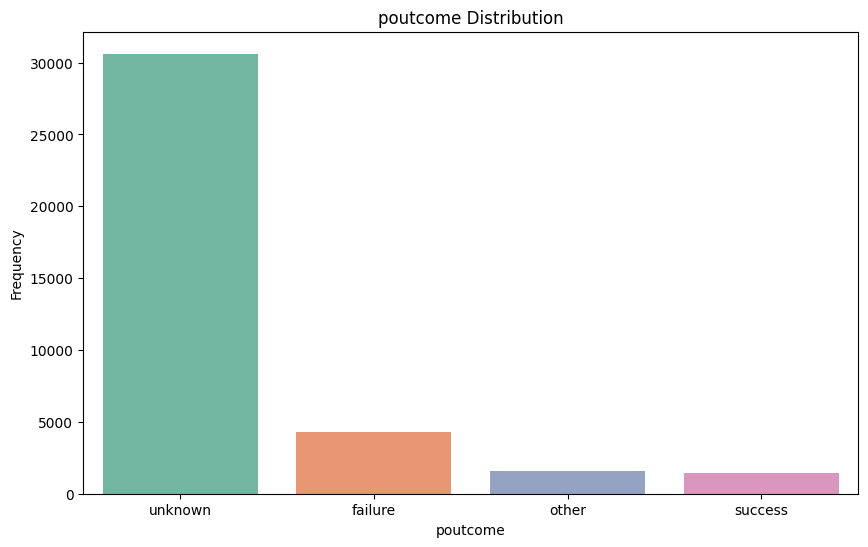

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['poutcome'].value_counts().index,
            y=df['poutcome'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('poutcome Distribution')
plt.xlabel('poutcome')
plt.ylabel('Frequency')
plt.show()

In [41]:
df['y'].value_counts()

y
no     33144
yes     4787
Name: count, dtype: int64

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\3570496386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=df['y'].value_counts().index,
C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\3570496386.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot( x=df['y'].value_counts().index,


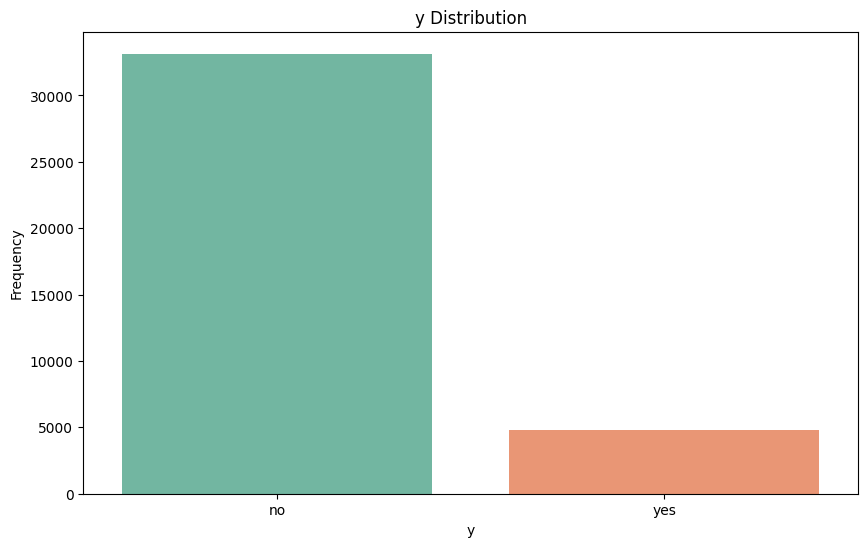

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot( x=df['y'].value_counts().index,
            y=df['y'].value_counts().values,
            palette=sns.color_palette("Set2"))
plt.title('y Distribution')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()

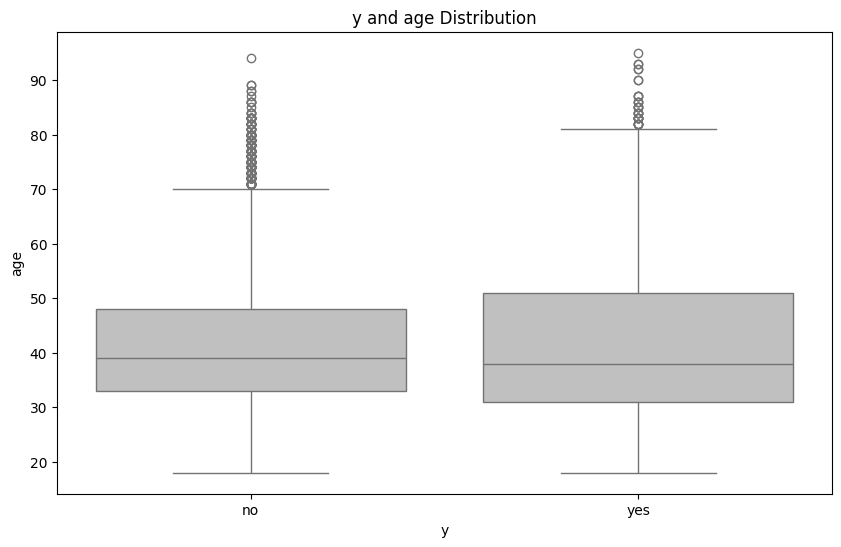

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['y'],y= df['age'], color='silver')
plt.title('y and age Distribution')
plt.xlabel('y')
plt.ylabel('age')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\632116963.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='job',


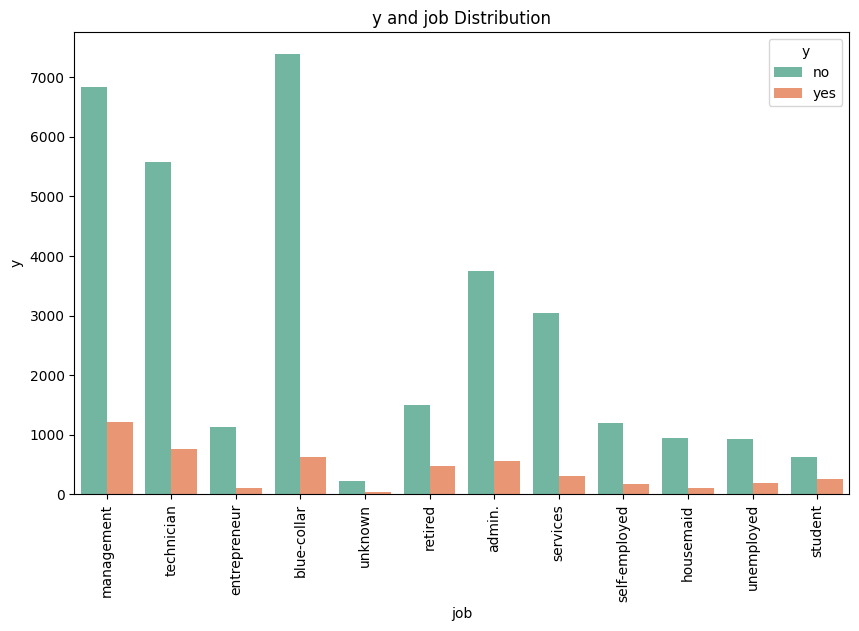

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='job',
            hue='y',
            palette=sns.color_palette("Set2"))
plt.title('y and job Distribution')
plt.xlabel('job')
plt.ylabel('y')
plt.xticks(rotation=90)
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1686123064.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='marital',


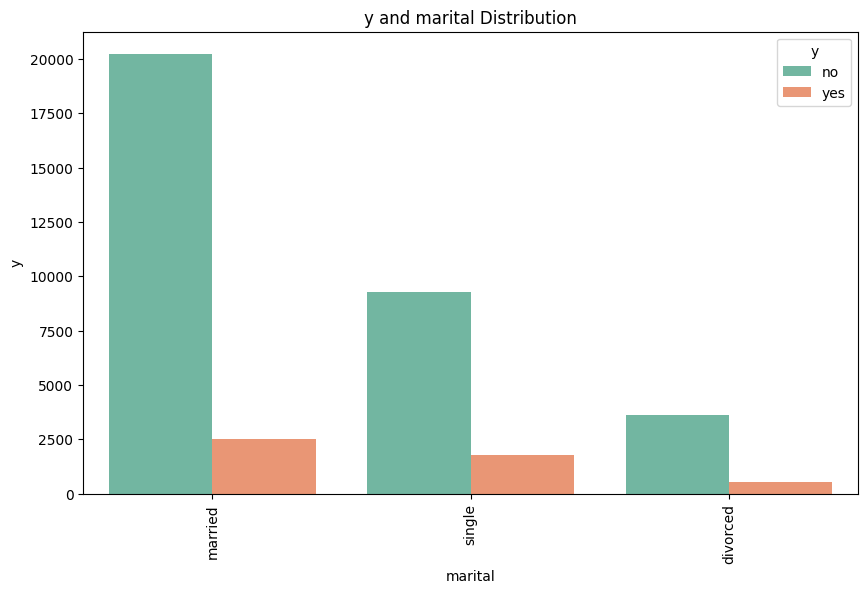

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='marital',
            hue='y',
            palette=sns.color_palette("Set2"))
plt.title('y and marital Distribution')
plt.xlabel('marital')
plt.ylabel('y')
plt.xticks(rotation=90)
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\4151204853.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='education',


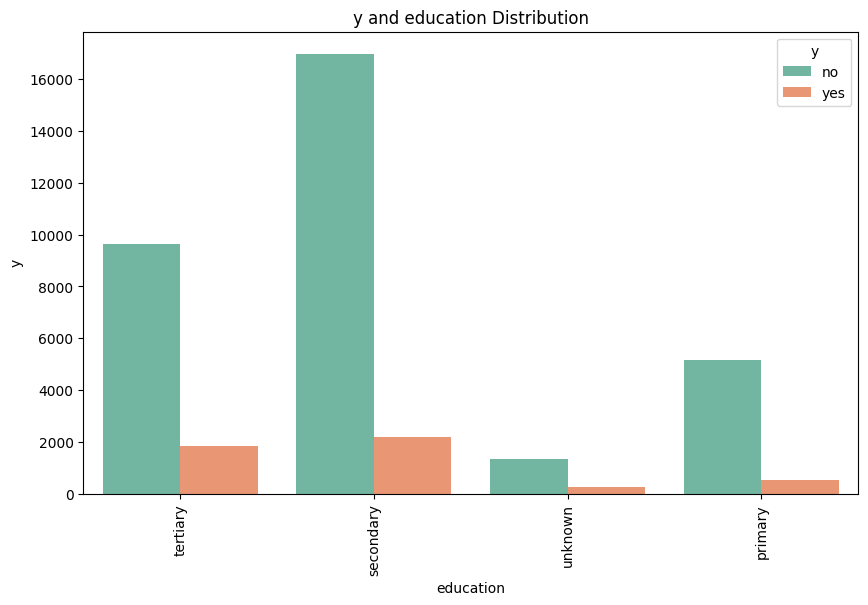

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='education',
            hue='y',
            palette=sns.color_palette("Set2"))
plt.title('y and education Distribution')
plt.xlabel('education')
plt.ylabel('y')
plt.xticks(rotation=90)
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\4131846356.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='default',


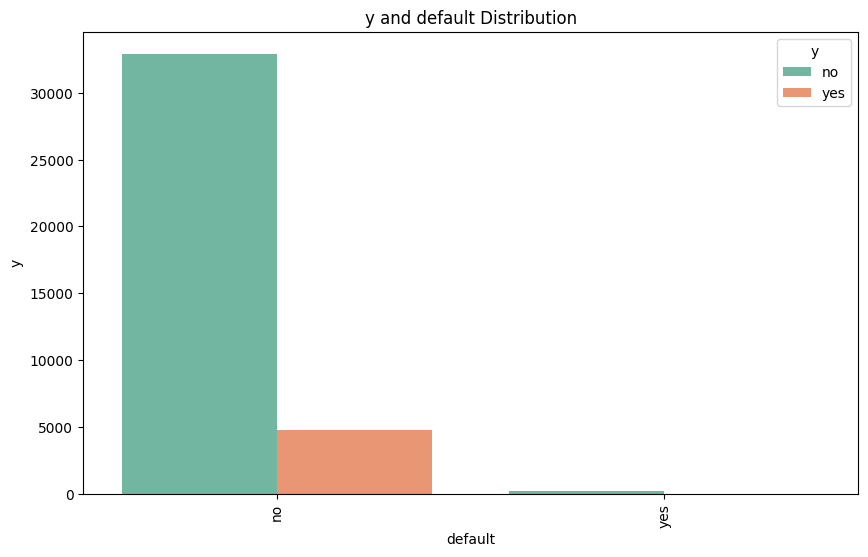

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='default',
            hue='y',
            palette=sns.color_palette("Set2"))
plt.title('y and default Distribution')
plt.xlabel('default')
plt.ylabel('y')
plt.xticks(rotation=90)
plt.show()

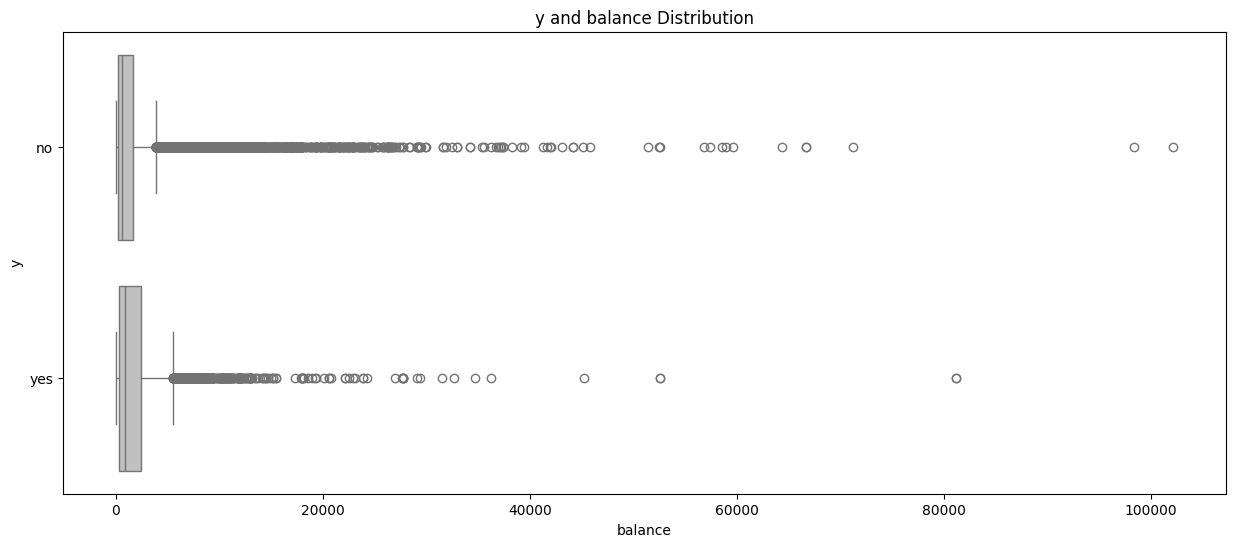

In [48]:
plt.figure(figsize=(15, 6))
sns.boxplot(x= df['balance'],y= df['y'], color='silver')
plt.title('y and balance Distribution')
plt.xlabel('balance')
plt.ylabel('y')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\784952152.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='housing',


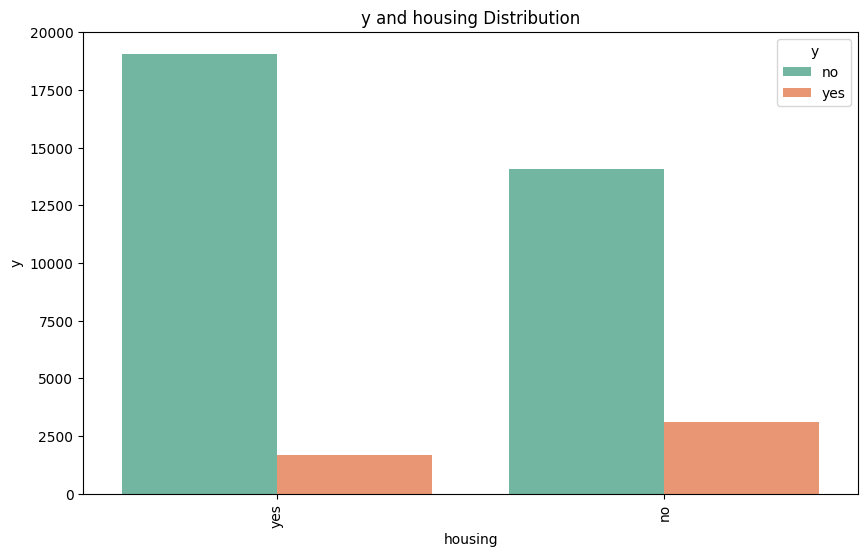

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='housing',
            hue='y',
            palette=sns.color_palette("Set2"))
plt.title('y and housing Distribution')
plt.xlabel('housing')
plt.ylabel('y')
plt.xticks(rotation=90)
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1177604474.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='loan',


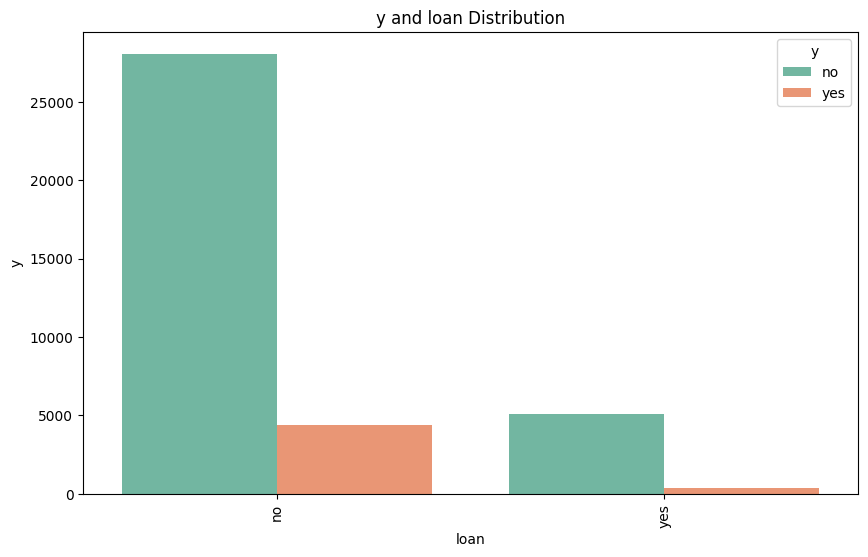

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='loan',
            hue='y',
            palette=sns.color_palette("Set2"))
plt.title('y and loan Distribution')
plt.xlabel('loan')
plt.ylabel('y')
plt.xticks(rotation=90)
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\2044614622.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='contact',


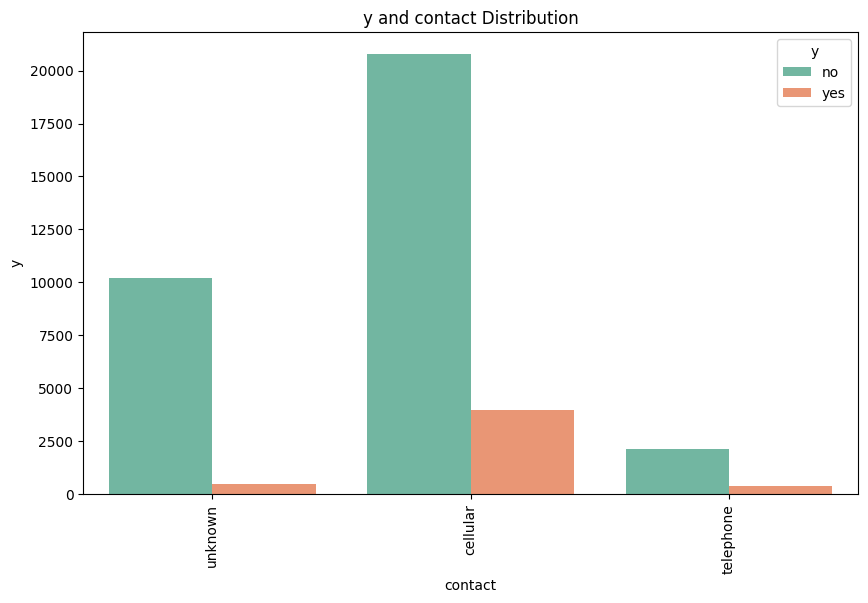

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='contact',
            hue='y',
            palette=sns.color_palette("Set2"))
plt.title('y and contact Distribution')
plt.xlabel('contact')
plt.ylabel('y')
plt.xticks(rotation=90)
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\2868610950.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='day',


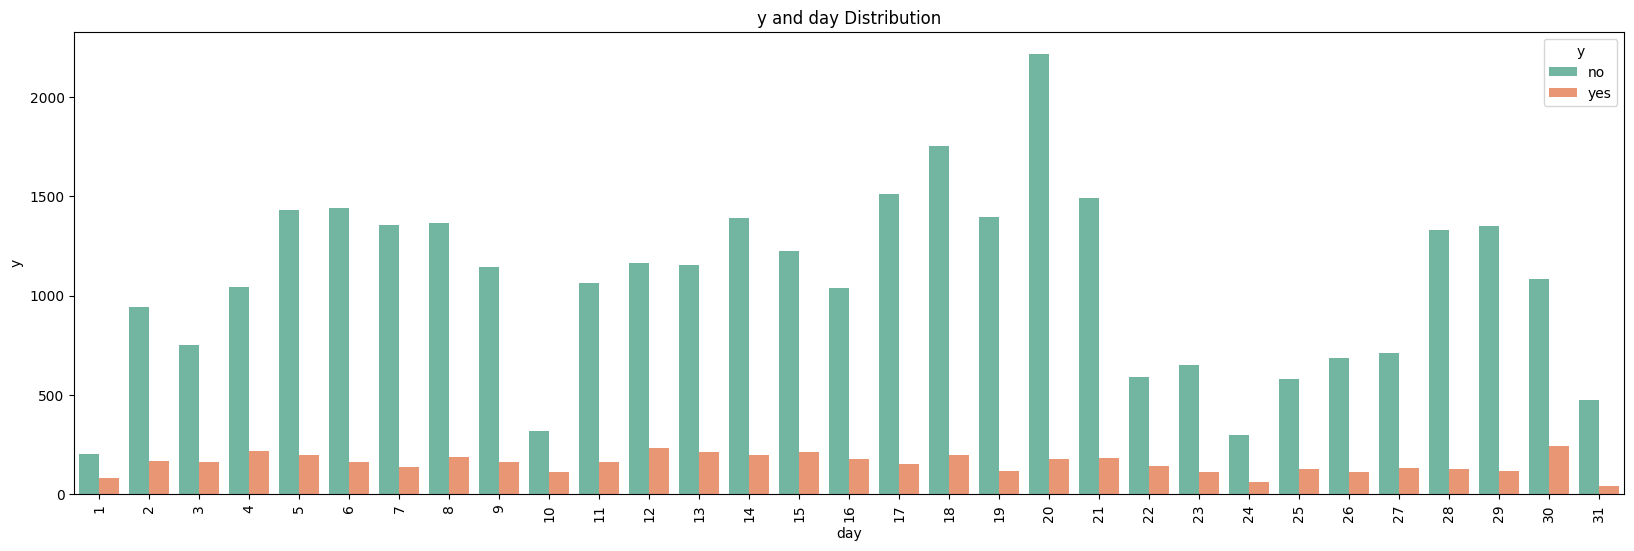

In [52]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df,x='day',
            hue='y',
            palette=sns.color_palette("Set2"))
plt.title('y and day Distribution')
plt.xlabel('day')
plt.ylabel('y')
plt.xticks(rotation=90)
plt.show()

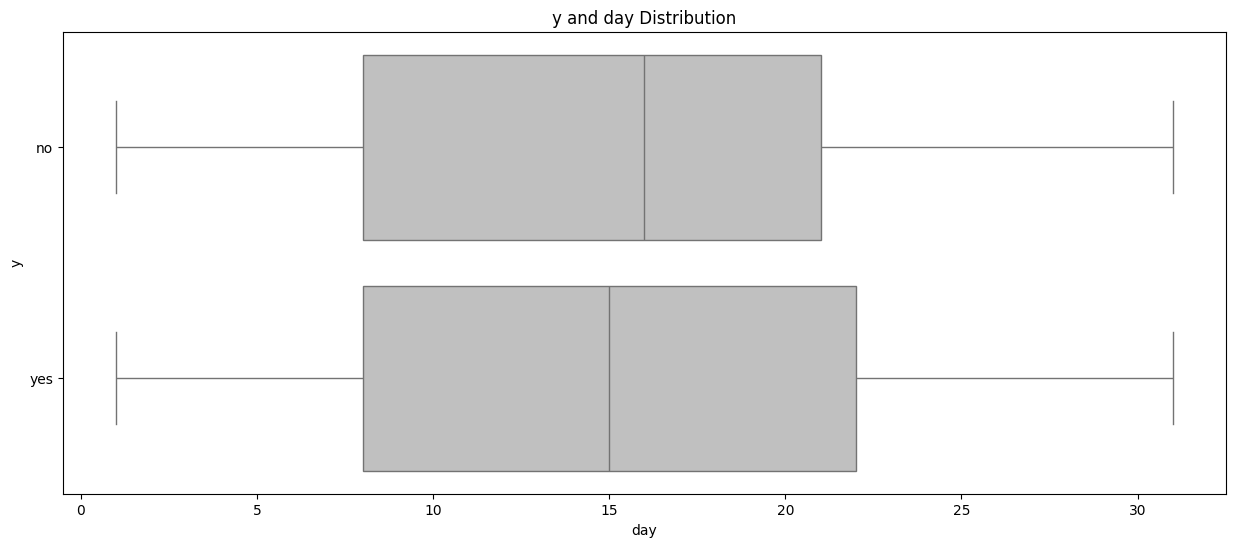

In [53]:
plt.figure(figsize=(15, 6))
sns.boxplot(x= df['day'],y= df['y'], color='silver')
plt.title('y and day Distribution')
plt.xlabel('day')
plt.ylabel('y')
plt.show()

C:\Users\Abdo\AppData\Local\Temp\ipykernel_3152\1848116038.py:2: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df,x='month',


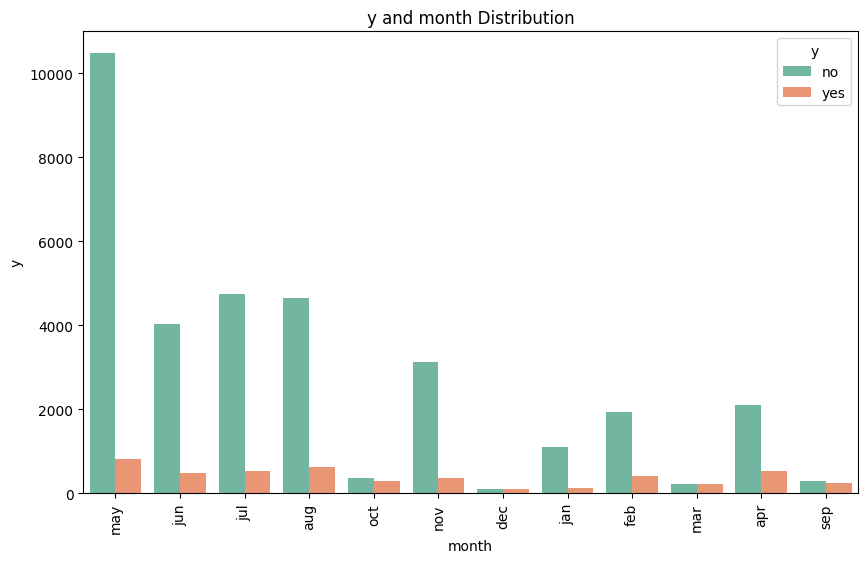

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='month',
            hue='y',
            palette=sns.color_palette("Set2"))
plt.title('y and month Distribution')
plt.xlabel('month')
plt.ylabel('y')
plt.xticks(rotation=90)
plt.show()

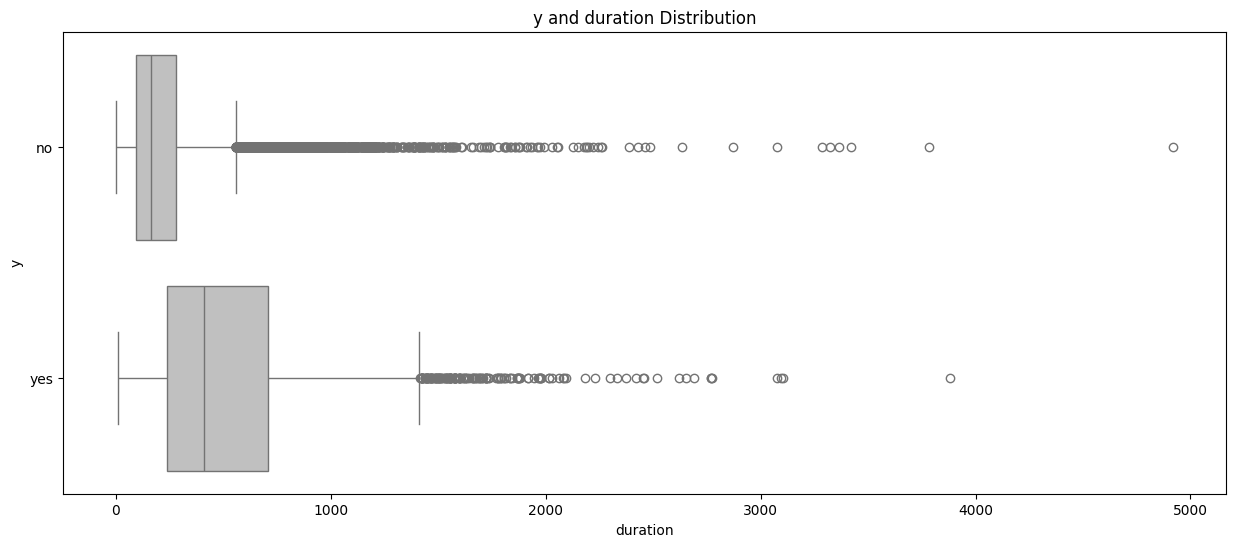

In [55]:
plt.figure(figsize=(15, 6))
sns.boxplot(x= df['duration'],y= df['y'], color='silver')
plt.title('y and duration Distribution')
plt.xlabel('duration')
plt.ylabel('y')
plt.show()

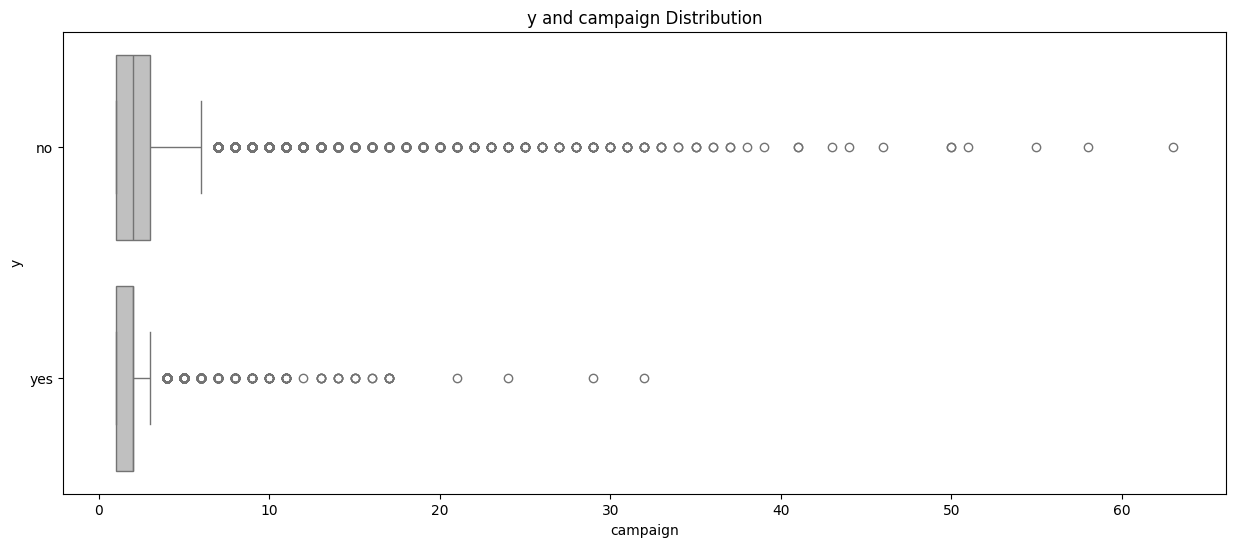

In [56]:
plt.figure(figsize=(15, 6))
sns.boxplot(x= df['campaign'],y= df['y'], color='silver')
plt.title('y and campaign Distribution')
plt.xlabel('campaign')
plt.ylabel('y')
plt.show()

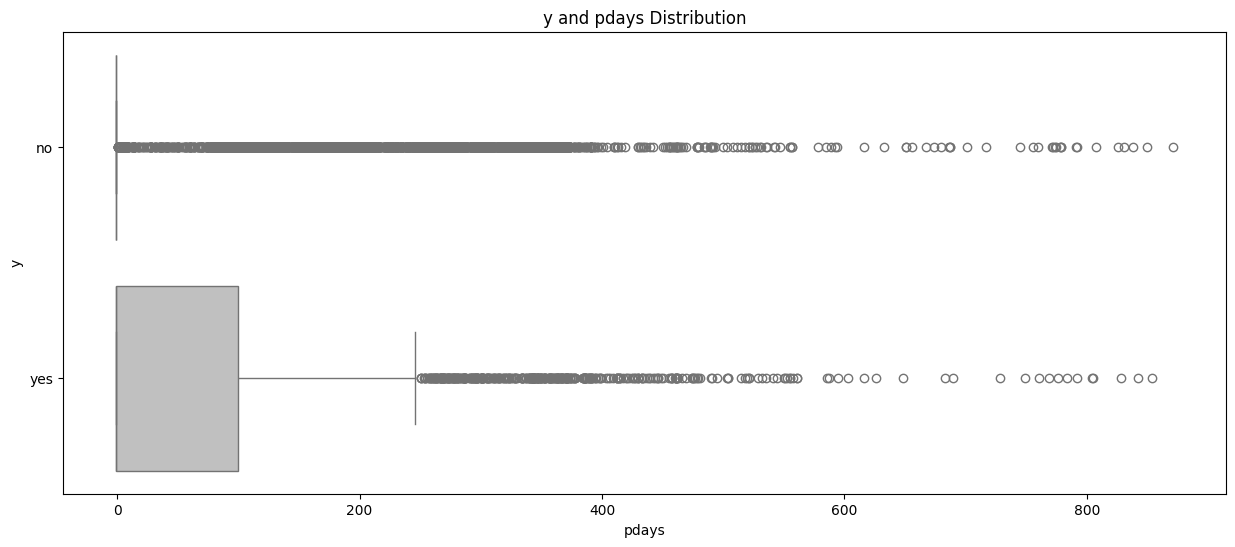

In [57]:
plt.figure(figsize=(15, 6))
sns.boxplot(x= df['pdays'],y= df['y'], color='silver')
plt.title('y and pdays Distribution')
plt.xlabel('pdays')
plt.ylabel('y')
plt.show()

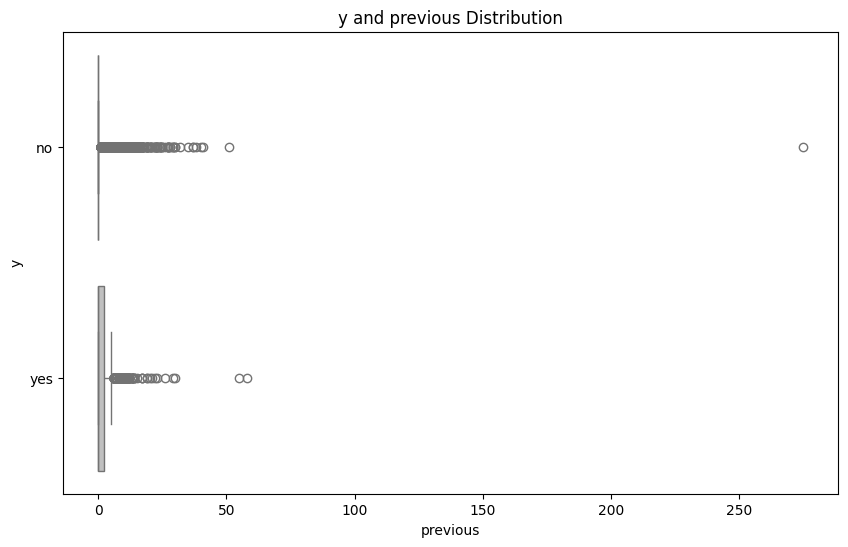

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['previous'],y= df['y'], color='silver')
plt.title('y and previous Distribution')
plt.xlabel('previous')
plt.ylabel('y')
plt.show()

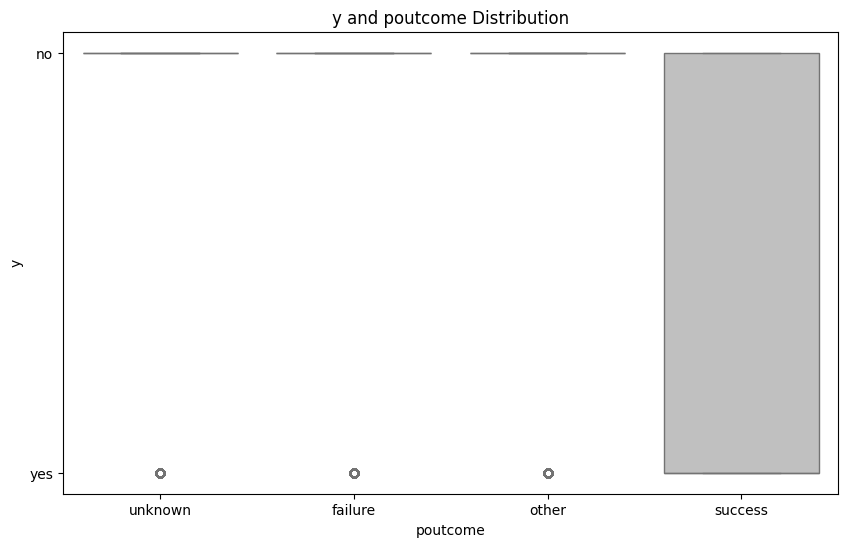

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x= df['poutcome'],y= df['y'], color='silver')
plt.title('y and poutcome Distribution')
plt.xlabel('poutcome')
plt.ylabel('y')
plt.show()

In [60]:
df.sample(9)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30902,40,management,married,tertiary,no,16,no,yes,cellular,9,feb,47,4,-1,0,unknown,no
23762,60,management,married,tertiary,no,3029,no,no,cellular,28,aug,26,9,-1,0,unknown,no
40648,47,housemaid,married,secondary,no,3940,yes,no,cellular,5,aug,226,3,97,2,failure,yes
36356,38,services,married,secondary,no,3039,yes,yes,cellular,11,may,146,2,-1,0,unknown,no
5818,47,services,married,secondary,no,2070,yes,yes,unknown,26,may,136,1,-1,0,unknown,no
7402,33,technician,married,secondary,no,1844,yes,no,unknown,29,may,241,3,-1,0,unknown,no
13321,28,blue-collar,married,primary,no,420,no,yes,telephone,8,jul,65,3,-1,0,unknown,no
34358,36,management,married,tertiary,no,953,yes,yes,telephone,4,may,354,2,335,3,other,no
5188,47,services,married,unknown,no,4822,yes,no,unknown,21,may,154,5,-1,0,unknown,no


In [61]:
x=df.drop(columns='y')
y=df['y']

In [62]:
encoder = LabelEncoder()
x['job'] = encoder.fit_transform(x['job'])
x['marital'] = encoder.fit_transform(x['marital'])
x['education'] = encoder.fit_transform(x['education'])
x['default'] = encoder.fit_transform(x['default'])
x['housing'] = encoder.fit_transform(x['housing'])
x['loan'] = encoder.fit_transform(x['loan'])
x['contact'] = encoder.fit_transform(x['contact'])
x['month'] = encoder.fit_transform(x['month'])
x['poutcome'] = encoder.fit_transform(x['poutcome'])
y = encoder.fit_transform(y)


In [63]:
scaler = MinMaxScaler()
x['balance'] = scaler.fit_transform(x[['balance']])
x['duration'] = scaler.fit_transform(x[['duration']])

In [64]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,0.020974,1,0,2,5,8,0.053070,1,-1,0,3
1,44,9,2,1,0,0.000274,1,0,2,5,8,0.030704,1,-1,0,3
2,33,2,1,1,0,0.000010,1,1,2,5,8,0.015453,1,-1,0,3
3,47,1,1,3,0,0.014737,1,0,2,5,8,0.018707,1,-1,0,3
4,33,11,2,3,0,0.000000,0,0,2,5,8,0.040260,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,0.008068,0,0,0,17,9,0.198658,3,-1,0,3
45207,71,5,0,0,0,0.016920,0,0,0,17,9,0.092721,2,-1,0,3
45208,72,5,1,1,0,0.055950,0,0,0,17,9,0.229158,5,184,3,2
45209,57,1,1,1,0,0.006531,0,0,1,17,9,0.103294,4,-1,0,3


In [65]:
y

array([0, 0, 0, ..., 1, 0, 0], shape=(37931,))

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True, random_state=42)

In [67]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

C:\Users\Abdo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [68]:
y_pred = lr.predict(x_test)


In [69]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 87.03%


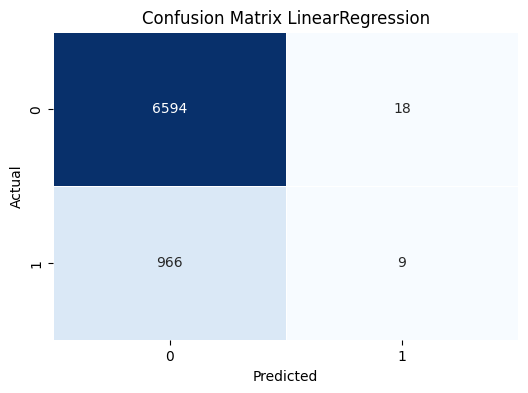

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix LinearRegression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [72]:
y_pred = svm_model.predict(x_test)


In [73]:
accuracy= accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:87.15%


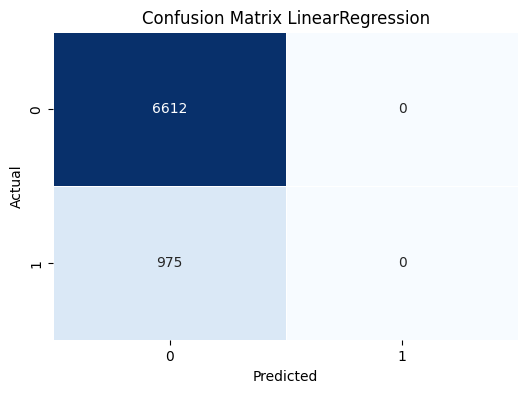

In [74]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix LinearRegression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=9)  
knn_model.fit(x_train, y_train)




,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [76]:
y_pred = knn_model.predict(x_test)
accuracy_score(y_test, y_pred)*100
print(f"Accuracy:{accuracy:.2f}%")

Accuracy:87.15%


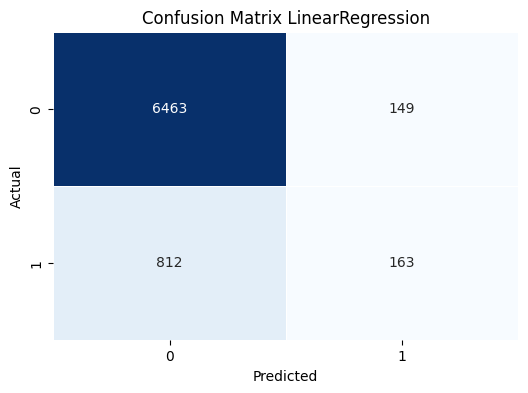

In [77]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix LinearRegression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()